In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("TATASTEEL.NS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-25,54.470001,55.060001,54.000000,54.575001,22.539684,44678590
1,2018-10-26,54.759998,56.160000,54.110001,55.154999,22.779224,60994130
2,2018-10-29,55.650002,57.549999,55.230000,57.369999,23.694027,57383130
3,2018-10-30,57.125000,57.200001,56.310001,56.450001,23.314064,40153190
4,2018-10-31,55.494999,55.779999,52.935001,55.384998,22.874212,140703330


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
988,2022-10-25,101.150002,102.500000,100.699997,101.199997,101.199997,37163180
989,2022-10-27,102.250000,104.650002,102.050003,104.199997,104.199997,74349009
990,2022-10-28,104.099998,104.599998,100.800003,101.599998,101.599998,51006232
991,2022-10-31,101.900002,102.150002,100.300003,101.550003,101.550003,38715841
992,2022-11-01,98.550003,101.449997,98.550003,101.199997,101.199997,69031178


In [4]:
df=df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2018-10-25,54.470001,55.060001,54.000000,54.575001,22.539684,44678590
1,1,2018-10-26,54.759998,56.160000,54.110001,55.154999,22.779224,60994130
2,2,2018-10-29,55.650002,57.549999,55.230000,57.369999,23.694027,57383130
3,3,2018-10-30,57.125000,57.200001,56.310001,56.450001,23.314064,40153190
4,4,2018-10-31,55.494999,55.779999,52.935001,55.384998,22.874212,140703330


In [25]:
df=df.drop(["Date","Adj Close"],axis=1)
df.head()

,index,Open,High,Low,Close,Volume
0,0,54.470001,55.060001,54.000000,54.575001,44678590
1,1,54.759998,56.160000,54.110001,55.154999,60994130
2,2,55.650002,57.549999,55.230000,57.369999,57383130
3,3,57.125000,57.200001,56.310001,56.450001,40153190
4,4,55.494999,55.779999,52.935001,55.384998,140703330


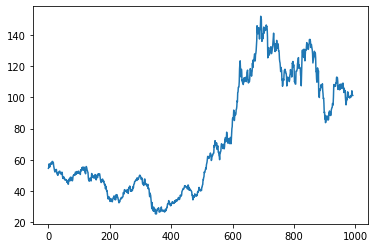

In [27]:
plt.plot(df.Close)

In [28]:
df

,index,Open,High,Low,Close,Volume
0,0,54.470001,55.060001,54.000000,54.575001,44678590
1,1,54.759998,56.160000,54.110001,55.154999,60994130
2,2,55.650002,57.549999,55.230000,57.369999,57383130
3,3,57.125000,57.200001,56.310001,56.450001,40153190
4,4,55.494999,55.779999,52.935001,55.384998,140703330
...,...,...,...,...,...,...
988,988,101.150002,102.500000,100.699997,101.199997,37163180
989,989,102.250000,104.650002,102.050003,104.199997,74349009
990,990,104.099998,104.599998,100.800003,101.599998,51006232
991,991,101.900002,102.150002,100.300003,101.550003,38715841


In [29]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
988    100.07490
989    100.03535
990     99.98405
991     99.92145
992     99.86495
Name: Close, Length: 993, dtype: float64

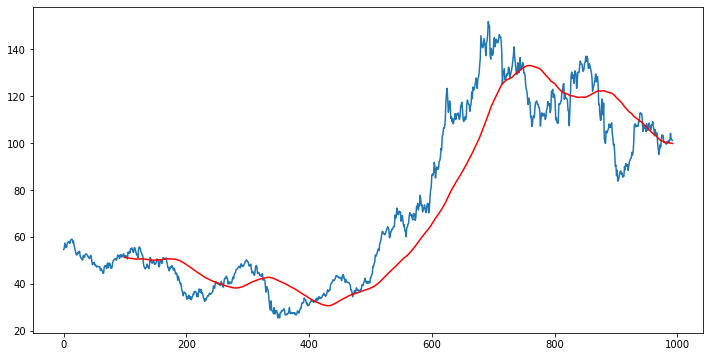

In [30]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,"r")

In [31]:
ma200=df.Close.rolling(100).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
988    100.07490
989    100.03535
990     99.98405
991     99.92145
992     99.86495
Name: Close, Length: 993, dtype: float64

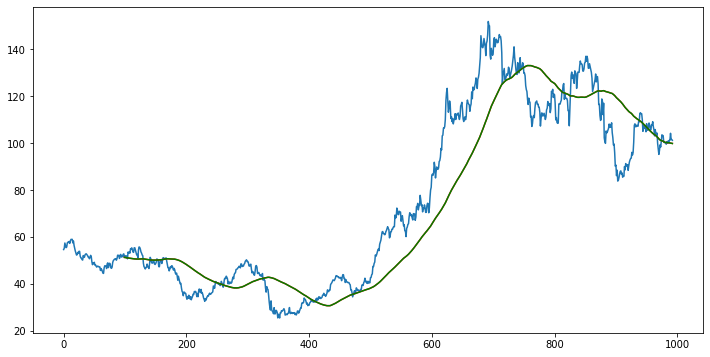

In [44]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [37]:
df.shape

(993, 6)

In [38]:
#split
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df["Close"][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(695, 1)
(298, 1)


In [39]:
data_training.head()

,Close
0,54.575001
1,55.154999
2,57.369999
3,56.450001
4,55.384998


In [40]:
data_testing.head()

,Close
695,137.559998
696,135.865005
697,140.464996
698,139.020004
699,137.505005


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [45]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[2.30711496e-01],
       [2.35294106e-01],
       [2.52794995e-01],
       [2.45526018e-01],
       [2.37111346e-01],
       [2.39284159e-01],
       [2.53071532e-01],
       [2.55757899e-01],
       [2.54414731e-01],
       [2.57970225e-01],
       [2.51609849e-01],
       [2.60024489e-01],
       [2.65041658e-01],
       [2.64962663e-01],
       [2.65160198e-01],
       [2.53111046e-01],
       [2.59668957e-01],
       [2.44577897e-01],
       [2.35175590e-01],
       [2.25891831e-01],
       [2.18820366e-01],
       [2.12183460e-01],
       [2.13487138e-01],
       [2.21072173e-01],
       [2.17872244e-01],
       [2.24667171e-01],
       [2.24746174e-01],
       [2.08548964e-01],
       [2.02623155e-01],
       [2.01912058e-01],
       [1.96815862e-01],
       [1.95156644e-01],
       [2.10563754e-01],
       [2.04242860e-01],
       [2.05270016e-01],
       [2.13526659e-01],
       [2.15896974e-01],
       [2.16213025e-01],
       [2.13013065e-01],
       [2.10524233e-01],


In [48]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [49]:
#ml model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [53]:
model=Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation="relu",return_sequences=True))
               
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation="relu",return_sequences=True))
               
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))



In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_8 (LSTM)               (None, 120)              

In [55]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
19/19 [==============================] - 9s 245ms/step - loss: 0.0567
Epoch 2/50
19/19 [==============================] - 3s 163ms/step - loss: 0.0239
Epoch 3/50
19/19 [==============================] - 2s 121ms/step - loss: 0.0116
Epoch 4/50
19/19 [==============================] - 4s 197ms/step - loss: 0.0069
Epoch 5/50
19/19 [==============================] - 4s 195ms/step - loss: 0.0069
Epoch 6/50
19/19 [==============================] - 2s 119ms/step - loss: 0.0063
Epoch 7/50
19/19 [==============================] - 3s 167ms/step - loss: 0.0067
Epoch 8/50
19/19 [==============================] - 4s 226ms/step - loss: 0.0061
Epoch 9/50
19/19 [==============================] - 2s 120ms/step - loss: 0.0056
Epoch 10/50
19/19 [==============================] - 3s 147ms/step - loss: 0.0057
Epoch 11/50
19/19 [==============================] - 5s 250ms/step - loss: 0.0049
Epoch 12/50
19/19 [==============================] - 2s 121ms/step - loss: 0.0053
Epoch 13/50
19/19 [======

In [56]:
model.save("keras_model")

INFO:tensorflow:Assets written to: keras_model\assets


In [57]:
data_testing.head()

,Close
695,137.559998
696,135.865005
697,140.464996
698,139.020004
699,137.505005


In [60]:
past_100_days=data_training.tail(100)

In [61]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\AAYUSH~1\AppData\Local\Temp/ipykernel_19404/3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [62]:
final_df.head()

,Close
0,70.279999
1,72.315002
2,76.684998
3,80.000000
4,81.184998


In [63]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.02492044],
       [0.07843496],
       [0.11903013],
       [0.1335415 ],
       [0.19624051],
       [0.20199611],
       [0.19599565],
       [0.21069069],
       [0.26402151],
       [0.24087677],
       [0.18215772],
       [0.21577274],
       [0.23928484],
       [0.22954938],
       [0.22685526],
       [0.23414159],
       [0.26769531],
       [0.27283858],
       [0.2913911 ],
       [0.33670098],
       [0.3289248 ],
       [0.40233899],
       [0.40558415],
       [0.44324024],
       [0.44213815],
       [0.44985303],
       [0.48750913],
       [0.58725202],
       [0.62888809],
       [0.6503796 ],
       [0.58333334],
       [0.52571637],
       [0.54867742],
       [0.58437423],
       [0.56508697],
       [0.49259119],
       [0.50244915],
       [0.47661029],
       [0.49277488],
       [0.46454807],
       [0.48230468],
       [0.49069309],
       [0.5178178 ],
       [0.48750913],
       [0.51585842],
       [0.51334799],
       [0.511

In [64]:
input_data.shape

(398, 1)

In [65]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [66]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(298, 100, 1)
(298,)


In [67]:
#prdict
y_predicted=model.predict(x_test)

10/10 [==============================] - 2s 81ms/step


In [68]:
y_predicted.shape

(298, 1)

In [69]:
y_test

array([0.82390395, 0.80314724, 0.85947826, 0.84178303, 0.82323051,
       0.83437413, 0.90350228, 0.91531952, 0.86749931, 0.8845211 ,
       0.90723737, 0.89909375, 0.88892963, 0.89033798, 0.91133964,
       0.93148419, 0.91782996, 0.9212588 , 0.89878767, 0.8365172 ,
       0.67389171, 0.7217732 , 0.73842764, 0.75422476, 0.69715893,
       0.69519963, 0.70799657, 0.72587548, 0.71773203, 0.72869217,
       0.76089875, 0.7519593 , 0.70671071, 0.7180994 , 0.73273333,
       0.74748966, 0.7669606 , 0.79782013, 0.82323051, 0.86731563,
       0.81325007, 0.78434975, 0.74932647, 0.72673278, 0.72312026,
       0.78477839, 0.76334807, 0.73083524, 0.75085721, 0.81080093,
       0.7480407 , 0.7632255 , 0.76304182, 0.78428846, 0.775349  ,
       0.72954929, 0.73083524, 0.71571155, 0.6645236 , 0.64413417,
       0.63341901, 0.59245657, 0.56606657, 0.59913056, 0.58253732,
       0.57659806, 0.50146954, 0.50446972, 0.4511389 , 0.46503792,
       0.50159194, 0.5084497 , 0.4971834 , 0.54616699, 0.57580

In [70]:
y_predicted

array([[0.8199786 ],
       [0.82659566],
       [0.8316486 ],
       [0.83469665],
       [0.83541334],
       [0.83372796],
       [0.82991314],
       [0.8248749 ],
       [0.81960684],
       [0.81463087],
       [0.81034386],
       [0.80712795],
       [0.8051357 ],
       [0.80427516],
       [0.80439425],
       [0.8054091 ],
       [0.80732775],
       [0.8100409 ],
       [0.81338763],
       [0.8170428 ],
       [0.82033515],
       [0.8217082 ],
       [0.81996006],
       [0.8147554 ],
       [0.8064398 ],
       [0.7953445 ],
       [0.7819875 ],
       [0.7671249 ],
       [0.7517027 ],
       [0.7365665 ],
       [0.7224912 ],
       [0.7102755 ],
       [0.70041364],
       [0.69284415],
       [0.68736583],
       [0.6837928 ],
       [0.6819955 ],
       [0.68192804],
       [0.68358386],
       [0.68701434],
       [0.6923548 ],
       [0.69935143],
       [0.707399  ],
       [0.7156237 ],
       [0.72306323],
       [0.7289656 ],
       [0.73316956],
       [0.735

In [71]:
scaler.scale_

array([0.0122459])

In [72]:
scale_factor=1/0.0122459
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

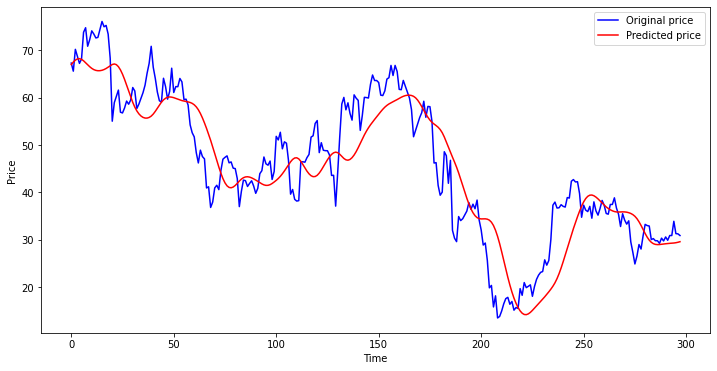

In [73]:
plt.figure(figsize=(12,6))
plt.plot(y_test,"b",label="Original price")
plt.plot(y_predicted,"r",label='Predicted price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()
